In [18]:
import numpy as np
from sklearn import metrics

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
x=pd.Series([0,1,0,1,1,1,1,0,0],name="Actual")
x

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    0
8    0
Name: Actual, dtype: int64

In [21]:
y=pd.Series([1,0,1,1,1,0,1,1,1],name="Predicted")
y

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    1
8    1
Name: Predicted, dtype: int64

In [22]:
df_confusion=pd.crosstab(x,y,rownames=["Actual"],colnames=["predicted"],margins=True)
df_confusion

predicted,0,1,All
Actual,,,
0,0,4,4
1,2,3,5
All,2,7,9


In [23]:
df_conf_norm=df_confusion/df_confusion.sum(axis=1)
df_conf_norm

predicted,0,1,All
Actual,,,
0,0.00,0.4,0.222222
1,0.25,0.3,0.277778
All,0.25,0.7,0.500000


In [24]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(y)): 
    if x[i]==y[i]==1:
            TP+=1
    if x[i] and y[i]==0:
            TN+=1
    if y[i]==1 and x[i]!=y[i]:
            FP+=1
    if y[i]==0 and x[i]!=y[i]:
            FN+=1
print("True Positive:",TP)
print("True Negative:",TN)
print("False Positive:",FP)
print("False Nehative:",FN)

True Positive: 3
True Negative: 2
False Positive: 4
False Nehative: 2


In [25]:
Accuracy=(TP+TN)/(TP+FN+FP+TN)
Accuracy

0.45454545454545453

In [26]:
recall=TP/(TP+FN)
recall

0.6

In [27]:
precision=TP/(TP+FN)
precision

0.6

In [28]:
f1_score=(recall*precision*2)/(recall+precision)
f1_score

0.6

In [29]:
TPR=TP/(TP+FN)
TPR

0.6

In [30]:
FPR=FP/(FP+TN)
FPR

0.6666666666666666

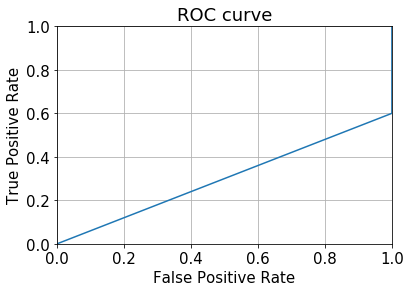

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(x, y)
plt.plot(fpr, tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.rcParams['font.size']=15
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [33]:
print(metrics.roc_auc_score(x, y))

0.3
